# Análise CSAT – MostraTec

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('../backend/data.db')

In [3]:
df = pd.read_sql_query('SELECT * FROM evaluations', conn)
df.head()

,id,timestamp,name,role,consent,phone,rating,comment
0,1,2025-06-10 22:09:59,Andrey Pereira Silva,aluno,1,(34) 99942-8117,5,None
1,2,2025-06-10 22:12:35,Bruna Barbosa Carrijo,aluno,1,(34) 99245-0614,5,None
2,3,2025-06-10 22:14:49,Natália Cristine Dias dos Santos,visitante,1,(16) 98161-1336,5,None
3,4,2025-06-10 22:16:02,Déborah Alves Correntino,visitante,1,(34) 99308-6393,5,None
4,5,2025-06-10 22:17:11,Matheus Santana Gonçalves,aluno,1,(34) 99161-2220,5,None


In [4]:
df = df.drop_duplicates(subset='phone', keep='first')
df.shape

(66, 8)

In [5]:
total = len(df)
soma_notas = df['rating'].sum()
promotores = df[df.rating >= 4].shape[0]
detratores = df[df.rating <= 2].shape[0]
nps = (promotores/total - detratores/total) * 100

print(f'Total de respostas: {total}')
print(f'Soma de notas: {soma_notas}')
print(f'Promotores: {promotores}')
print(f'Detratores: {detratores}')
print(f'NPS estimado: {nps:.1f}%')


Total de respostas: 66
Soma de notas: 327
Promotores: 66
Detratores: 0
NPS estimado: 100.0%


In [6]:
resumo_por_papel = df.groupby('role').agg(
    total_respostas=('rating','count'),
    media_nota=('rating','mean')
)
resumo_por_papel

,total_respostas,media_nota
role,,
aluno,35,4.942857
professor,2,5.000000
visitante,29,4.965517


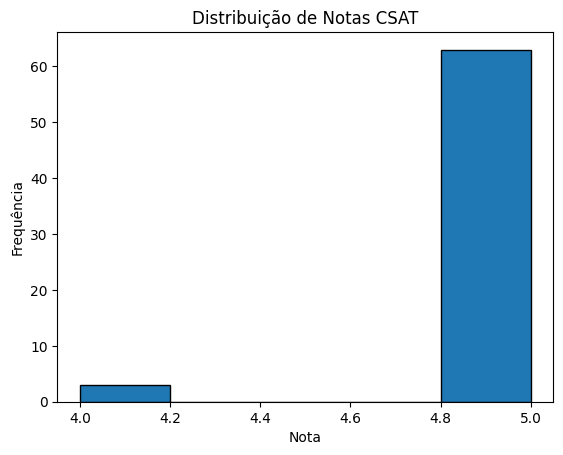

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['rating'], bins=5, edgecolor='black')
plt.title('Distribuição de Notas CSAT')
plt.xlabel('Nota')
plt.ylabel('Frequência')
plt.show()

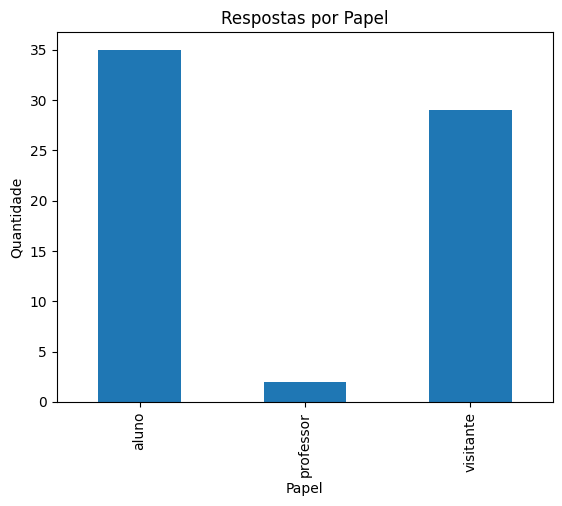

In [8]:
resumo_por_papel['total_respostas'].plot.bar()
plt.title('Respostas por Papel')
plt.xlabel('Papel')
plt.ylabel('Quantidade')
plt.show()

In [32]:
ganhador = df.sample(1)
ganhador[['name','phone']]

,name,phone
47,Isaque de Sousa silva,(34) 99667-3912
